<h1> Black Friday Sales Prediction </h1> <br>
Dataset : <a hrf= "https://datahack.analyticsvidhya.com/contest/black-friday/">Click Here</a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df.shape

(550068, 12)

In [5]:
#checking null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


I believe that the NaN values for Product_Category_2 and Product_Categrory_3 would mean that the  person did not 
buy the products from these categories.

Hence, I believe that it would be safe to replace them with 0.

In [7]:
#filling missing values
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

We can drop User_ID and Product_ID column

In [9]:
df.drop({'User_ID', 'Product_ID'}, axis=1, inplace=True)

In [10]:
df.head()    

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [12]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [13]:
def gender(Gender):
    if Gender == 'M':
        return 0
    else:
        return 1    

df['Gender']=df['Gender'].apply(gender)

In [14]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

def age(Age):
    if Age == '0-17':
        return 0
    elif Age=='18-25':
        return 1 
    elif Age=='26-35':
        return 2
    elif Age=='36-45':
        return 3 
    elif Age=='46-50':
        return 4
    elif Age=='51-55':
        return 5 
    elif Age=='55+':
        return 6 

df['Age']=df['Age'].apply(age)

In [15]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
def Category(City_Category):
    if City_Category == 'A':
        return 0
    elif City_Category=='B':
        return 1
    else:
        return 2    

df['City_Category']=df['City_Category'].apply(Category)

In [17]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
def stay(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '4+':
        return 4
    else:
        return int(Stay_In_Current_City_Years)    

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].apply(stay)

In [19]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,0,2,0,3,0.0,0.0,8370
1,1,0-17,10,0,2,0,1,6.0,14.0,15200
2,1,0-17,10,0,2,0,12,0.0,0.0,1422
3,1,0-17,10,0,2,0,12,14.0,0.0,1057
4,0,55+,16,2,4,0,8,0.0,0.0,7969


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

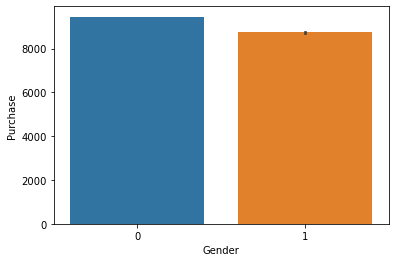

In [21]:
sns.barplot('Gender', 'Purchase', data = df)
plt.xlabel("Gender") 
plt.ylabel("Purchase") 
plt.show() 

From above graph we can see purchasing rate of male is slightly greater than female
<br>
<br>
Lets check how Age affects the purchase

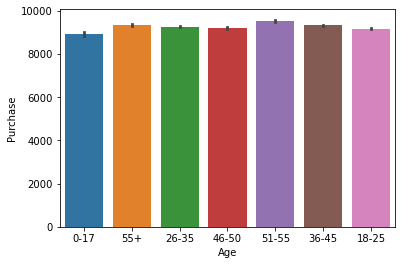

In [22]:
sns.barplot('Age', 'Purchase', data = df)
plt.xlabel("Age") 
plt.ylabel("Purchase")
plt.show() 

From above graph we can see that purchase rate of people of the age group 5 is high. <br>
<br>
Now, lets see how city category affects the Purchase. 

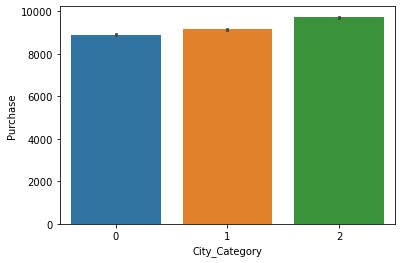

In [23]:
sns.barplot('City_Category', 'Purchase', data = df)
plt.xlabel("City_Category") 
plt.ylabel("Purchase") 
plt.show() 

Okay so, the people belonging to category 2 tend to spend a little more. These may be the more developed cities that we are talking about here.


Let's now draw a heatmap to clearly see what are the correlations here.

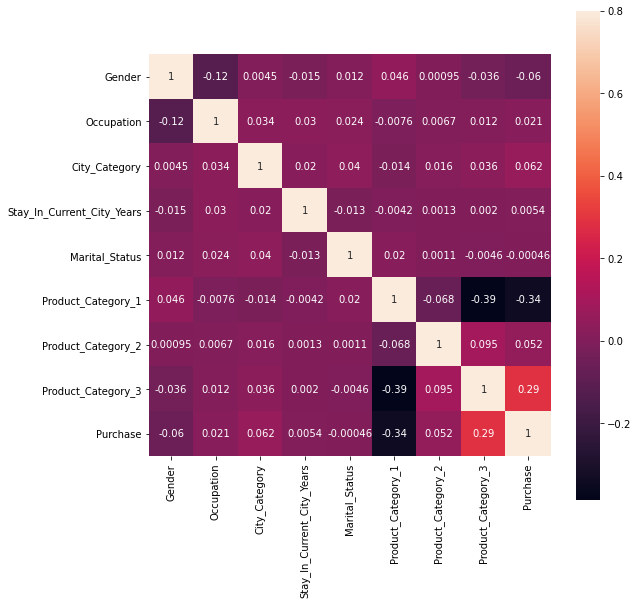

In [24]:
df.corr()
fig,ax = plt.subplots(figsize = (9,9))
sns.heatmap(df.corr(), annot=True, vmax=.8, square=True)

It can be seen that nothing is highly correlated withthe Purchase variable. Although a few conclusions can be drawn:

Product_Category_1 has a negative correlation with Purchase.<br>
Maritial_Status and Age are strongly correlated. As Expected.<br>
Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

In [25]:
Product_Category_1 = df.Product_Category_1.mean()
Product_Category_2=df.Product_Category_2.mean() 
Product_Category_3=df.Product_Category_3.mean() 
print(f"Product_Category_1 : {Product_Category_1} \n Product_Category_2 : {Product_Category_2} \n Product_Category_3 : {Product_Category_3}")

Product_Category_1 : 5.404270017525106 
 Product_Category_2 : 6.735436346051761 
 Product_Category_3 : 3.841941359977312


Yess, Product_Category_3  has less price as compare to  Product_Category_1 and Product_Category_2 

In [26]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [57]:
x=df[['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]
y=df['Purchase']

In [58]:
x=pd.get_dummies(x)

In [59]:
x.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,10,0,2,0,3,0.0,0.0
1,1,10,0,2,0,1,6.0,14.0
2,1,10,0,2,0,12,0.0,0.0
3,1,10,0,2,0,12,14.0,0.0
4,0,16,2,4,0,8,0.0,0.0


In [60]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

<h4>Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import numpy as np

In [64]:
lnr=LinearRegression()
lnr.fit(x_train, y_train)
y_pred = lnr.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, accuracy_score

In [66]:
mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error :',mse)
rms=np.sqrt(mse)
print('root_mean_squared_error :',rms)
print('mean_absolute_error :',mean_absolute_error(y_test, y_pred))

mean_squared_error : 21462705.690698724
root_mean_squared_error : 4632.785953473215
mean_absolute_error : 3536.497144067502


<h4>Ridge

In [67]:
Ridge=Ridge()
Ridge.fit(x_train, y_train)
y_pred1 = Ridge.predict(x_test)

In [68]:
mse = mean_squared_error(y_test, y_pred1)
print('mean_squared_error :', mse)
rms=np.sqrt(mse)
print('root_mean_squared_error :',rms)
print('mean_absolute_error :',mean_absolute_error(y_test, y_pred1))

mean_squared_error : 21462705.68890392
root_mean_squared_error : 4632.785953279508
mean_absolute_error : 3536.4970294950913


<h4> Lasso

In [69]:
Lasso=Lasso()
Lasso.fit(x_train, y_train)
y_pred2 = Lasso.predict(x_test)

In [70]:
mse = mean_squared_error(y_test, y_pred2)
print('mean_squared_error :', mse)
rms=np.sqrt(mse)
print('root_mean_squared_error :',rms)
print('mean_absolute_error :',mean_absolute_error(y_test, y_pred2))

mean_squared_error : 21462764.856154677
root_mean_squared_error : 4632.79233898463
mean_absolute_error : 3536.398205941031


<h3>Test Data

In [71]:
df2 = pd.read_csv('test.csv')
print(df2.head())
print(df2.shape)
print(df2.isnull().sum())
print(df2.describe())
df2['Product_Category_2'].fillna(0, inplace=True)
df2['Product_Category_3'].fillna(0, inplace=True)
print(df2.isnull().sum())
 
print(df2.info())
print(df2.Gender.unique())

def gender(Gender):
    if Gender == 'M':
        return 0
    else:
        return 1    

df2['Gender']=df2['Gender'].apply(gender)

print(df2.Age.unique())
def age(Age):
    if Age == '0-17':
        return 0
    elif Age=='18-25':
        return 1 
    elif Age=='26-35':
        return 2
    elif Age=='36-45':
        return 3 
    elif Age=='46-50':
        return 4
    elif Age=='51-55':
        return 5 
    elif Age=='55+':
        return 6 

df2['Age']=df2['Age'].apply(age)

print(df2.City_Category.unique())
def Category(City_Category):
    if City_Category == 'A':
        return 0
    elif City_Category=='B':
        return 1
    else:
        return 2    

df2['City_Category']=df2['City_Category'].apply(Category)

print(df2.Stay_In_Current_City_Years.unique())
def stay(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '4+':
        return 4
    else:
        return int(Stay_In_Current_City_Years)    

df2['Stay_In_Current_City_Years']=df2['Stay_In_Current_City_Years'].apply(stay)
print(df2.head())

xtest=df[['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]

print(xtest.head())

predicted = lnr.predict(xtest)

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0   

In [72]:
predicted= pd.DataFrame(predicted)
df2['Purchase']=predicted

Final_Result=df2[['Purchase','User_ID','Product_ID']]
Final_Result.to_csv('Final_Result.csv', index=False, header=True)